In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("threads_reviews.csv")


In [29]:
df

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43
...,...,...,...,...
32905,App Store,This killed my dog. Mark zuckerburg strangled ...,1,2023-07-06 01:23:55
32906,App Store,Add Search and hashtag like Twitter !,1,2023-07-19 08:01:06
32907,App Store,bad twister,1,2023-07-17 06:39:13
32908,App Store,Yet another trash from Meta.,1,2023-07-07 17:47:16


In [30]:
df.isnull().sum()

source                0
review_description    0
rating                0
review_date           0
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   source              32910 non-null  object        
 1   review_description  32910 non-null  object        
 2   rating              32910 non-null  int64         
 3   review_date         32910 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.0+ MB


In [47]:
df['review_date'] = pd.to_datetime(df['review_date'], format='%Y-%m-%d')

In [31]:
contagem = df['rating'].value_counts()
valores = contagem.index
frequencias = contagem.values

Text(0.5, 1.0, 'Gráfico de Colunas')

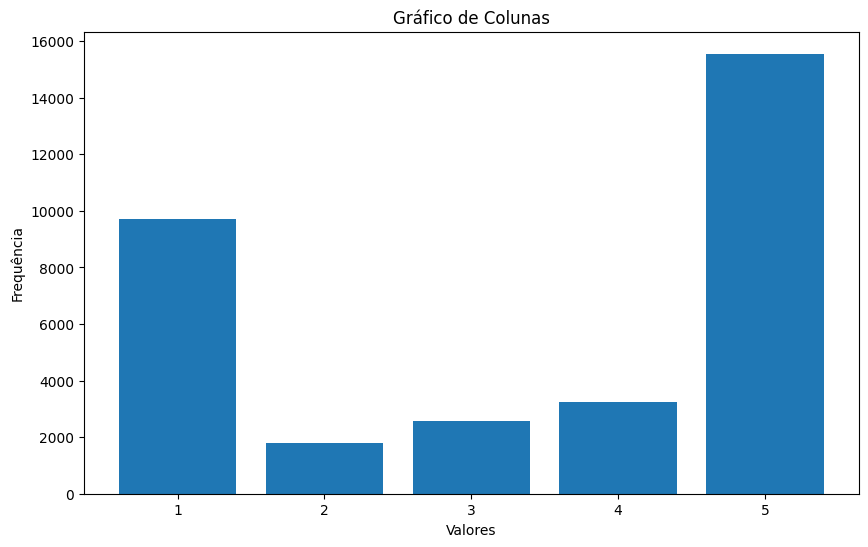

In [32]:
plt.figure(figsize=(10, 6))  
plt.bar(valores, frequencias)
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Gráfico de Colunas')


In [33]:
contagem = df['source'].value_counts()
contagem

Google Play    30270
App Store       2640
Name: source, dtype: int64

In [34]:
words = df['review_description'].str.split().explode()

In [39]:
palavras_a_excluir = ['to', 'I', 'the', 'and','is','a','it','of','this','for','but','you','my','in','on','that','not','be','so','with','just','i','than','from','this','see','nice',"its's",'an','or','as','The','your','are',]
words = words[~words.isin(palavras_a_excluir)]
word_counts = words.value_counts()

Text(0.5, 1.0, 'Contagem de Palavras')

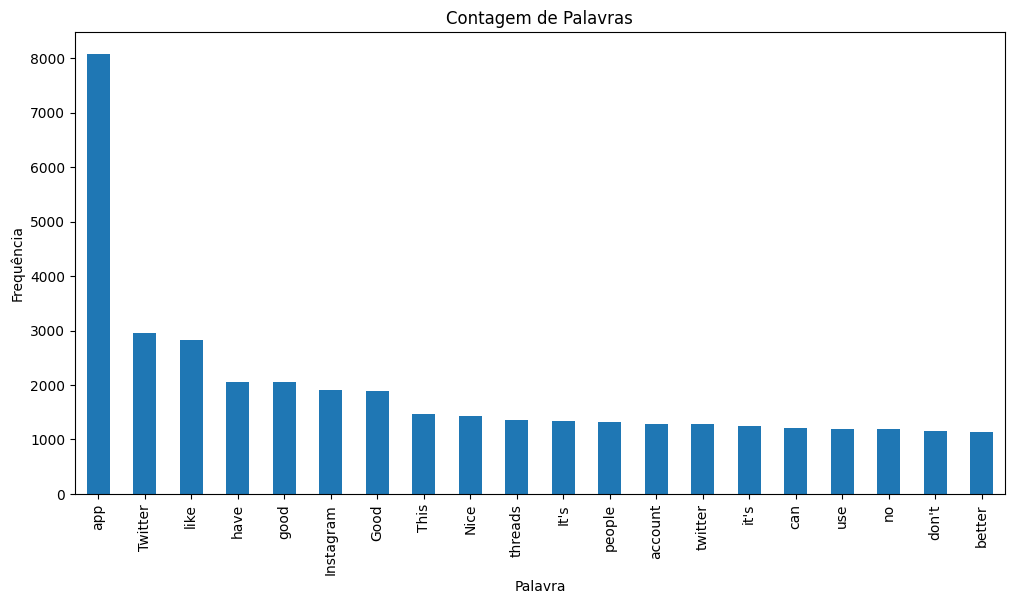

In [40]:
plt.figure(figsize=(12, 6)) 
word_counts.head(20).plot(kind='bar') 
plt.xlabel('Palavra')
plt.ylabel('Frequência')
plt.title('Contagem de Palavras')

Text(0.5, 1.0, 'Proporção de avaliação por ferramenta')

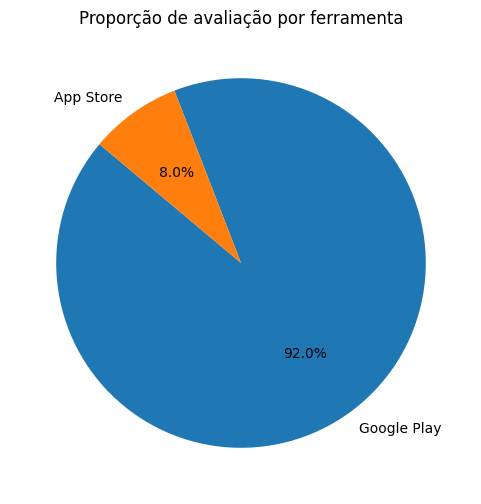

In [43]:
word_counts = df['source'].value_counts()
plt.figure(figsize=(6, 6))  
plt.pie(word_counts, labels=word_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporção de avaliação por ferramenta')


In [55]:
df['semana'] = df['review_date'].dt.strftime('%U')
contagem_semanas = df['semana'].value_counts().sort_index()


Text(0.5, 1.0, 'Contagem de Ocorrências por Semana')

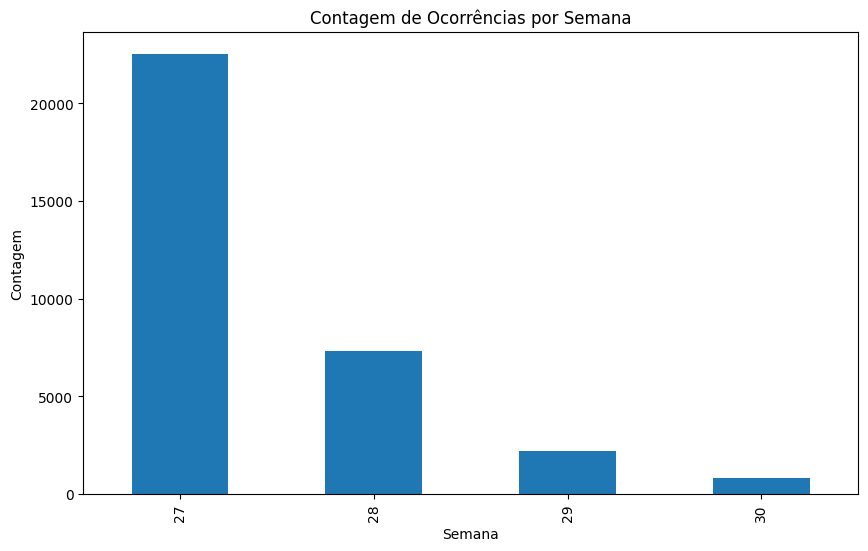

In [56]:
plt.figure(figsize=(10, 6))  
contagem_semanas.plot(kind='bar')
plt.xlabel('Semana')
plt.ylabel('Contagem')
plt.title('Contagem de Ocorrências por Semana')


In [58]:
df['inicio_semana'] = df['review_date'] - pd.to_timedelta(df['review_date'].dt.dayofweek, unit='D')